In [1]:
#%matplotlib inline
%matplotlib notebook

# conda install basemap netCDF4

In [2]:
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import matplotlib.pyplot as plt

## read in topo data (on a regular lat/lon grid)
  longitudes go from 20 to 380.

In [5]:
# read in topo data (on a regular lat/lon grid)
# longitudes go from 20 to 380.
topoin = np.loadtxt('data/etopo20data.gz')
lons = np.loadtxt('data/etopo20lons.gz')
lats = np.loadtxt('data/etopo20lats.gz')

## shift data so lons go from -180 to 180 instead of 20 to 380.

In [6]:
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)

## setup of basemap ('lcc' = lambert conformal conic).
  use major and minor sphere radii from WGS84 ellipsoid.

In [7]:
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.)

## transform to nx x ny regularly spaced native projection grid

In [8]:
# transform to nx x ny regularly spaced native projection grid
nx = int((m.xmax-m.xmin)/40000.)+1; ny = int((m.ymax-m.ymin)/40000.)+1
topodat,x,y = m.transform_scalar(topoin,lons,lats,nx,ny,returnxy=True)

## create the figure.

<IPython.core.display.Javascript object>


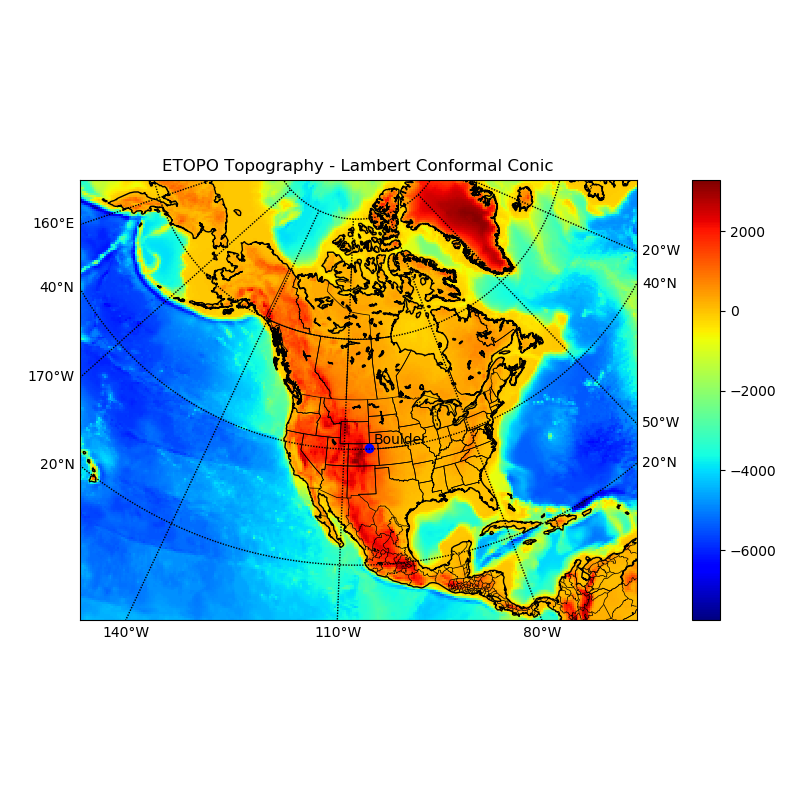

In [9]:
# create the figure.
fig=plt.figure(figsize=(8,8))

## add an axes.

In [10]:
# add an axes.
ax = fig.add_axes([0.1,0.1,0.8,0.8])

## associate this axes with the Basemap instance.

In [11]:
# associate this axes with the Basemap instance.
m.ax = ax

## plot image over map with imshow.

In [12]:
# plot image over map with imshow.
im = m.imshow(topodat,plt.cm.jet)
cb = m.colorbar(im,location='right',pad='10%') # draw colorbar

## plot blue dot on boulder, colorado and label it as such.

In [13]:
# plot blue dot on boulder, colorado and label it as such.
xpt,ypt = m(-104.237,40.125) 
m.plot([xpt],[ypt],'bo') 
ax.text(xpt+100000,ypt+100000,'Boulder')

Text(5966980.623491474, 3590111.1562384833, 'Boulder')

## draw coastlines and political boundaries.

In [14]:
# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
m.drawstates()

## draw parallels and meridians.
 label on left, right and bottom of map.

In [15]:
# draw parallels and meridians.
# label on left, right and bottom of map.
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,1,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,1,0,1])

{160.0: ([<matplotlib.lines.Line2D at 0x7f819f137710>],
  [Text(-113089.30469874793, 8044445.01172333, '160°E')]),
 190.0: ([<matplotlib.lines.Line2D at 0x7f819f12e9e8>],
  [Text(-113089.30469874793, 4935956.7944983905, '170°W')]),
 220.0: ([<matplotlib.lines.Line2D at 0x7f819f1384e0>],
  [Text(938641.2289996078, -113089.30469874795, '140°W')]),
 250.0: ([<matplotlib.lines.Line2D at 0x7f819f1387f0>],
  [Text(5236034.807552029, -113089.30469874795, '110°W')]),
 280.0: ([<matplotlib.lines.Line2D at 0x7f819f138b00>],
  [Text(9386412.289996078, -113089.30469874795, '80°W')]),
 310.0: ([<matplotlib.lines.Line2D at 0x7f819f138e10>],
  [Text(11422019.774573542, 4004306.147260945, '50°W')]),
 340.0: ([<matplotlib.lines.Line2D at 0x7f819f134160>],
  [Text(11422019.774573542, 7497996.0744013665, '20°W')])}

## set title.

In [16]:
# set title.
ax.set_title('ETOPO Topography - Lambert Conformal Conic')
#plt.show()

Text(0.5, 1.0, 'ETOPO Topography - Lambert Conformal Conic')